In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, plot_confusion_matrix

%matplotlib inline

In [3]:
mnist_train = pd.read_csv(r"E:\python\MNIST\mnist_train.csv")
mnist_test = pd.read_csv(r"E:\python\MNIST\mnist_test.csv")

In [4]:
Data = mnist_train.to_numpy()
np.random.seed = 0
data = Data[np.random.permutation(Data.shape[0])]

test = mnist_test.to_numpy()

In [5]:
X = data[:, 1:]
Y = data[:, 0]

X_test = test[:, 1:]
Y_test = test[:, 0]

label =  1


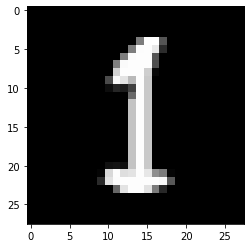

In [6]:
i = 55
img = X[i].reshape(28,28)
plt.imshow(img, cmap='gray')
print('label = ', Y[i])

In [7]:
X_data_std = X/255
X_test_std = X_test/255

X_train = X_data_std[:48000]
X_val = X_data_std[48000:60000]

Y_train = Y[:48000]
Y_val = Y[48000:60000]

# Logistic Regression

In [ ]:
train_scores = []
test_scores = []
for c in np.arange(0.1, 100, 1):
    clf = LogisticRegression(C=c, multi_class='ovr', class_weight='balance', verbose=1, penalty='l2', n_jobs = -1)
    clf.fit(X_train, Y_train)
    
    train_scores.append(clf.score(X_train, Y_train))
    test_scores.append(clf.score(X_test_std, Y_test))

plt.plot(np.arange(0.1, 100, 1), np.array(train_scores), 'b-')
plt.plot(np.arange(0.1, 100, 1), np.array(test_scores), 'r-')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed: 13.2min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   18.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  1.9min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  4.2min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  6.7min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  9.2min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10

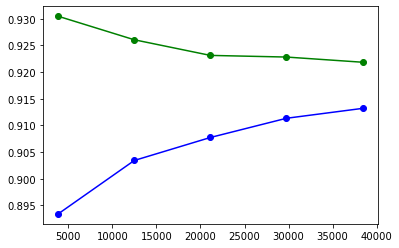

In [8]:
clf = LogisticRegression(C=0.1, multi_class='ovr', class_weight='balance', verbose=1, penalty='l2', n_jobs = -1)
clf.fit(X_train, Y_train)

# Overfitting and Underfitting
train_sizes, train_score, test_score = learning_curve(clf, X_train, Y_train, cv=5)
plt.plot(train_sizes, train_score.mean(axis=1), 'go-')
plt.plot(train_sizes, test_score.mean(axis=1), 'bo-')

# KNN

In [ ]:
train_scores = []
test_scores = []
for k in range(1, 100,5):
    clf = KNeighborsClassifier(n_neighbors=k, weights='uniform', n_jobs=-1)
    clf.fit(X_train, Y_train)
    
    train_scores.append(clf.score(X_train, Y_train))
    test_scores.append(clf.score(X_test_std, Y_test))

plt.plot(np.arange(1, 100, 5), np.array(train_scores), 'b-')
plt.plot(np.arange(1, 100, 5), np.array(test_scores), 'r-')

In [1]:
clf = KNeighborsClassifier(n_neighbors=5, weights='uniform', n_jobs=-1)
clf.fit(X_train, Y_train)

# Overfitting and Underfitting
train_sizes, train_score, test_score = learning_curve(clf, X_train, Y_train, cv=5)
plt.plot(train_sizes, train_score.mean(axis=1), 'go-')
plt.plot(train_sizes, test_score.mean(axis=1), 'bo-')

NameError: name 'KNeighborsClassifier' is not defined

In [ ]:
h_val = clf.predict(X_val)
print('validation precision:', precision_score(Y_val, h_val, average='weighted'))

# SVM

In [ ]:
train_scores = []
test_scores = []
for c in np.arange(0.1, 10, 0.5):
    clf = SVC(C=c, kernel='rbf', class_weight='balanced')
    clf.fit(X_train, Y_train)
    
    train_scores.append(clf.score(X_train, Y_train))
    test_scores.append(clf.score(X_test_std, Y_test))

plt.plot(np.arange(0.1, 10, 1), np.array(train_scores), 'b-')
plt.plot(np.arange(0.1, 10, 1), np.array(test_scores), 'r-')

In [ ]:
clf = SVC(C=1, kernel='rbf', class_weight='balanced')
clf.fit(X_train, Y_train)

# Overfitting and Underfitting
train_sizes, train_score, test_score = learning_curve(clf, X_train, Y_train, cv=5)
plt.plot(train_sizes, train_score.mean(axis=1), 'go-')
plt.plot(train_sizes, test_score.mean(axis=1), 'bo-')

print(clf.score(X_train, Y_train))
print(clf.score(X_test_std, Y_test))

In [ ]:
h_val = clf.predict(X_val)
print('validation precision:', precision_score(Y_val, h_val, average='weighted'))